<a href="https://colab.research.google.com/github/Orrm23/DeepSeek-Coder/blob/main/athelete_speed_dashboard5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

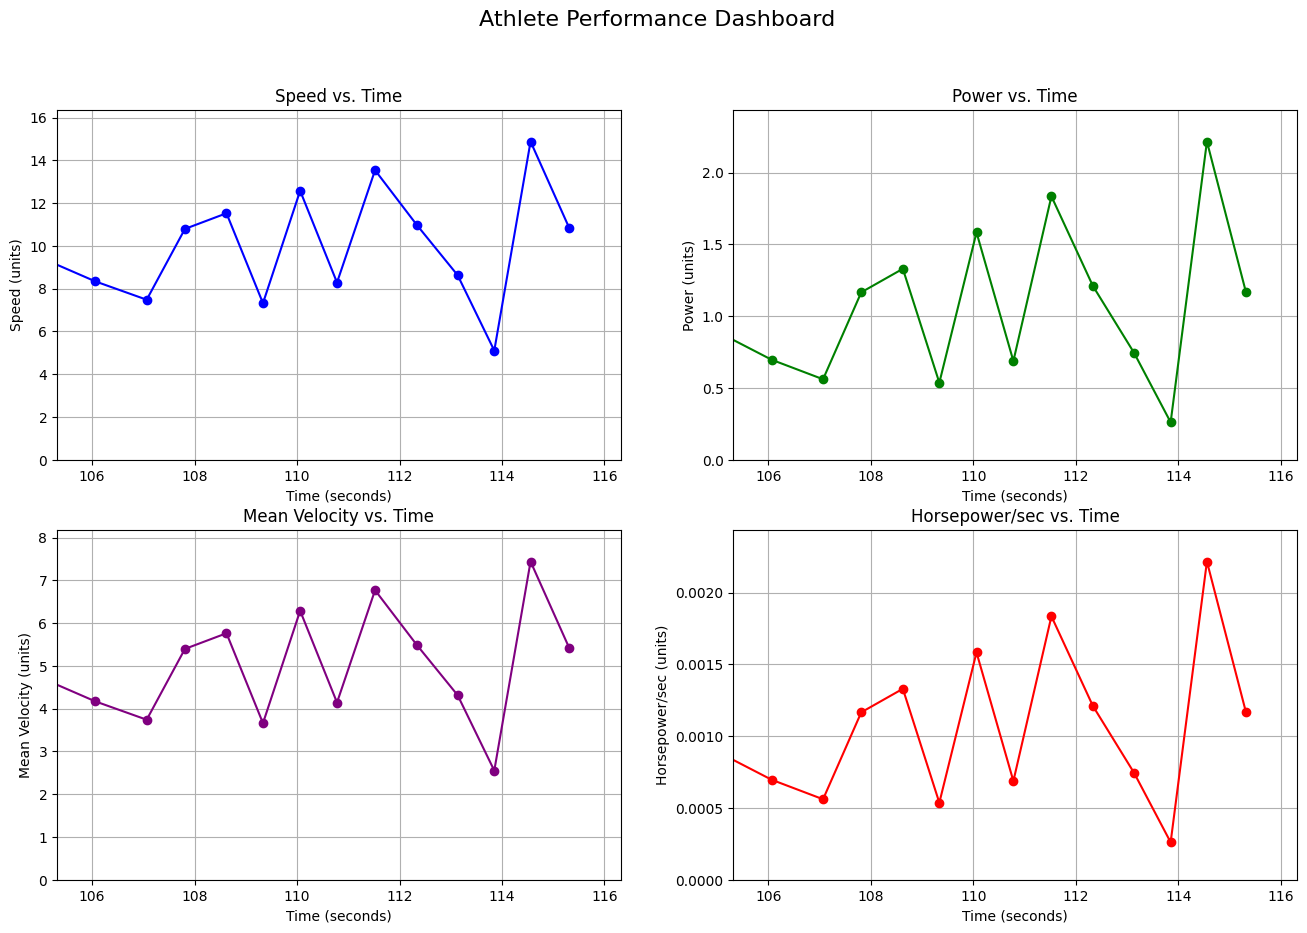

In [ ]:
# prompt: create visual dashboard for speed,power,mean velocity,horsepower persecond analysis using rpm for atheletes speed analysis device where we calculate athelets speed through revolution per minute through absolute encoder sensor live.the dashboard should be more visual and should use 2d modeling for graphs of all above parameter and clearity in all above  graphs ploted

import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import display, clear_output
import random

# --- Simulation Data Generation (Replace with Live Data) ---
def simulate_data(rpm_values):
  """Simulates speed, power, mean velocity, and horsepower/sec data based on RPM."""
  speed_values = [rpm * 0.1 for rpm in rpm_values]  # Example relationship: speed proportional to RPM
  power_values = [rpm**2 * 0.0001 for rpm in rpm_values]  # Example relationship: power increases with RPM^2
  mean_velocity_values = [rpm * 0.05 for rpm in rpm_values]
  horsepower_per_sec_values = [power * 0.001 for power in power_values] #Example: Horsepower increase with power
  return speed_values, power_values, mean_velocity_values, horsepower_per_sec_values

# --- Initialize Parameters ---
rpm_data = []
time_data = []
speed_data = []
power_data = []
mean_velocity_data = []
horsepower_per_sec_data = []
start_time = time.time()
max_points = 50

# --- Create the Figure and Axes ---
plt.ion()  # Turn on interactive mode
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Athlete Performance Dashboard', fontsize=16)

# --- Initialize Plot Lines ---
line_speed, = axs[0, 0].plot([], [], '-o', color='blue')
line_power, = axs[0, 1].plot([], [], '-o', color='green')
line_mean_velocity, = axs[1, 0].plot([], [], '-o', color='purple')
line_horsepower_per_sec, = axs[1, 1].plot([], [], '-o', color='red')

# --- Set Plot Labels and Limits ---
axs[0, 0].set_title('Speed vs. Time')
axs[0, 0].set_xlabel('Time (seconds)')
axs[0, 0].set_ylabel('Speed (units)')
axs[0, 0].set_xlim(0, 10)
axs[0, 0].set_ylim(0, 10)
axs[0, 0].grid(True)

axs[0, 1].set_title('Power vs. Time')
axs[0, 1].set_xlabel('Time (seconds)')
axs[0, 1].set_ylabel('Power (units)')
axs[0, 1].set_xlim(0, 10)
axs[0, 1].set_ylim(0, 1)
axs[0, 1].grid(True)

axs[1, 0].set_title('Mean Velocity vs. Time')
axs[1, 0].set_xlabel('Time (seconds)')
axs[1, 0].set_ylabel('Mean Velocity (units)')
axs[1, 0].set_xlim(0, 10)
axs[1, 0].set_ylim(0, 5)
axs[1, 0].grid(True)

axs[1, 1].set_title('Horsepower/sec vs. Time')
axs[1, 1].set_xlabel('Time (seconds)')
axs[1, 1].set_ylabel('Horsepower/sec (units)')
axs[1, 1].set_xlim(0, 10)
axs[1, 1].set_ylim(0, 0.1)
axs[1, 1].grid(True)

# --- Animation Loop ---
try:
  while True:
    # Simulate Data (Replace with Live Sensor Readings)
    current_time = time.time() - start_time
    rpm = random.uniform(50, 150) #random generation of rpm replace with live rpm sensor data

    rpm_data.append(rpm)
    time_data.append(current_time)
    speed, power, mean_velocity, horsepower_per_sec = simulate_data([rpm])
    speed_data.extend(speed)
    power_data.extend(power)
    mean_velocity_data.extend(mean_velocity)
    horsepower_per_sec_data.extend(horsepower_per_sec)

    # --- Trim Data if Exceeding Max Points ---
    if len(time_data) > max_points:
        time_data = time_data[-max_points:]
        speed_data = speed_data[-max_points:]
        power_data = power_data[-max_points:]
        mean_velocity_data = mean_velocity_data[-max_points:]
        horsepower_per_sec_data = horsepower_per_sec_data[-max_points:]

    # --- Update Line Data ---
    line_speed.set_data(time_data, speed_data)
    line_power.set_data(time_data, power_data)
    line_mean_velocity.set_data(time_data, mean_velocity_data)
    line_horsepower_per_sec.set_data(time_data, horsepower_per_sec_data)

    # --- Update Axis Limits (Dynamic Scaling) ---
    axs[0, 0].set_xlim(max(0, current_time - 10), current_time + 1)
    axs[0, 0].set_ylim(0, max(speed_data) * 1.1)
    axs[0, 1].set_xlim(max(0, current_time - 10), current_time + 1)
    axs[0, 1].set_ylim(0, max(power_data) * 1.1)
    axs[1, 0].set_xlim(max(0, current_time - 10), current_time + 1)
    axs[1, 0].set_ylim(0, max(mean_velocity_data) * 1.1)
    axs[1, 1].set_xlim(max(0, current_time - 10), current_time + 1)
    axs[1, 1].set_ylim(0, max(horsepower_per_sec_data) * 1.1)

    # --- Redraw and Update ---
    fig.canvas.draw()
    fig.canvas.flush_events()
    clear_output(wait=True)
    display(fig)

    time.sleep(0.1)  # Adjust for faster/slower updates

except KeyboardInterrupt:
  plt.ioff()
  plt.show()
  print("Dashboard stopped by user.")
